# HY1: Urbanization Effect

**Hypothesis:**
- Urbanization → PM₂.₅ ↑ (positive)
- Urbanization → O₃ ↓ (negative)


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [17]:
# Load data
df = pd.read_csv('../cleaned_data/analysis_ready.csv')
df = df[['urban_population_pct', 'mean_value_PM25', 'mean_value_O3']].dropna()

print(f"Data shape: {df.shape}")
df.head()

Data shape: (168, 3)


,urban_population_pct,mean_value_PM25,mean_value_O3
42,85.182,3.624,0.021
43,85.300,3.624,0.021
44,85.402,3.624,0.021
45,85.502,3.624,0.021
46,85.602,3.624,0.021


In [18]:
# Correlation analysis
r_pm25, p_pm25 = pearsonr(df['urban_population_pct'], df['mean_value_PM25'])
r_o3, p_o3 = pearsonr(df['urban_population_pct'], df['mean_value_O3'])

print("Urbanization → PM₂.₅:")
print(f"  r = {r_pm25:.3f}, p = {p_pm25:.4f}")
print(f"  Result: {'✓ Positive (as expected)' if r_pm25 > 0 else '✗ Negative'}")

print("\nUrbanization → O₃:")
print(f"  r = {r_o3:.3f}, p = {p_o3:.4f}")
print(f"  Result: {'✓ Negative (as expected)' if r_o3 < 0 else '✗ Positive'}")

if r_pm25 > 0 and r_o3 < 0 and p_pm25 < 0.05 and p_o3 < 0.05:
    print("\n✓ Hypothesis SUPPORTED")
else:
    print("\n⚠ Hypothesis PARTIALLY supported")

Urbanization → PM₂.₅:
  r = -0.914, p = 0.0000
  Result: ✗ Negative

Urbanization → O₃:
  r = 0.502, p = 0.0000
  Result: ✗ Positive

⚠ Hypothesis PARTIALLY supported


/var/folders/x7/878s1bxj4c950snx6h2200k00000gn/T/ipykernel_3774/629424891.py:16: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/x7/878s1bxj4c950snx6h2200k00000gn/T/ipykernel_3774/629424891.py:17: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.savefig('../visualizations/HY1_urbanization.png', dpi=300, bbox_inches='tight')


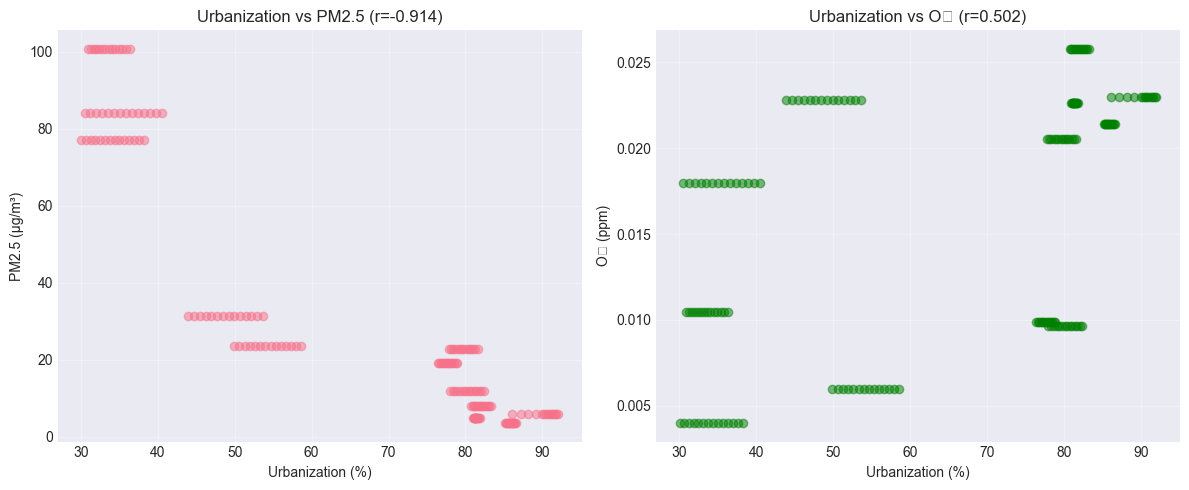

In [22]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['urban_population_pct'], df['mean_value_PM25'], alpha=0.5)
axes[0].set_xlabel('Urbanization (%)')
axes[0].set_ylabel('PM2.5 (µg/m³)')
axes[0].set_title(f'Urbanization vs PM2.5 (r={r_pm25:.3f})')
axes[0].grid(alpha=0.3)

axes[1].scatter(df['urban_population_pct'], df['mean_value_O3'], alpha=0.5, color='green')
axes[1].set_xlabel('Urbanization (%)')
axes[1].set_ylabel('O₃ (ppm)')
axes[1].set_title(f'Urbanization vs O₃ (r={r_o3:.3f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/HY1_urbanization.png', dpi=300, bbox_inches='tight')
plt.show()

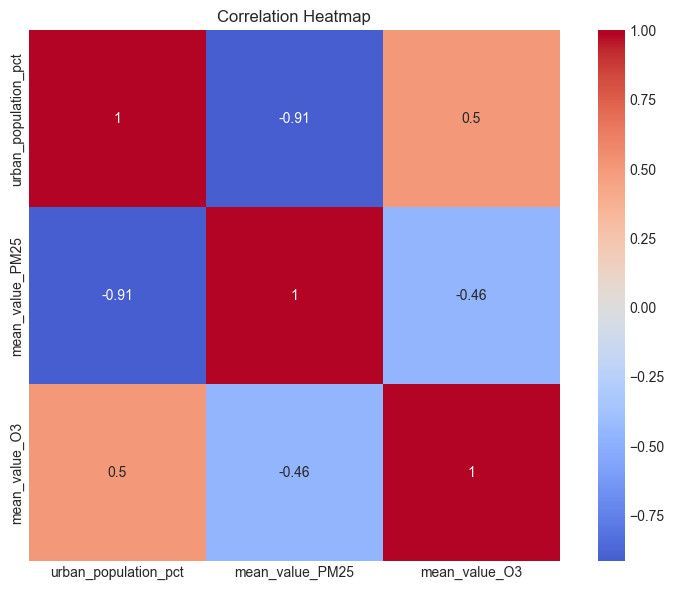

In [20]:
# Heatmap
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('../visualizations/HY1_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()